In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [5]:
data = {
    'x1': [26766, 26922, 28182, 31047, 37320, 39498, 38206, 48118, 53073.8, 59735, 62779.4],
    'x2': [27612, 29742, 31324, 32396, 34285, 37382, 42503, 47073, 55182.0, 62984, 60878.5],
    'x3': [79199.7, 83387.2, 86148.6, 92037.2, 103861.7, 109608.3, 107390.3, 131015, 155188.9, 172148.3, 179956],
    'x4': [2479.1, 3182.7, 3775.3, 2852.3, 2828.4, 2998.9, 3168.8, 3573.6, 3231.7, 4981.6, 10770],
    'x5': [17, 11, 10, 7.75, 7.75, 6.25, 4.25, 8.50, 7.50, 16.00, 21.00],
    'x6': [11.36, 12.91, 5.38, 2.52, 4.27, 3.05, 4.91, 8.39, 11.92, 7.42, 8.09],
    'x7': [68.34, 79.70, 63.81, 68.87, 79.46, 69.34, 90.68, 84.07, 75.66, 99.16, 106.1],
    'y': [56.26, 72.88, 60.66, 57.60, 69.47, 61.91, 73.88, 74.29, 65.44, 89.69, 101.68]
}
index = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df = pd.DataFrame(data, index=index)

In [6]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,y
2014,26766.0,27612.0,79199.7,2479.1,17.0,11.36,68.34,56.26
2015,26922.0,29742.0,83387.2,3182.7,11.0,12.91,79.70,72.88
2016,28182.0,31324.0,86148.6,3775.3,10.0,5.38,63.81,60.66


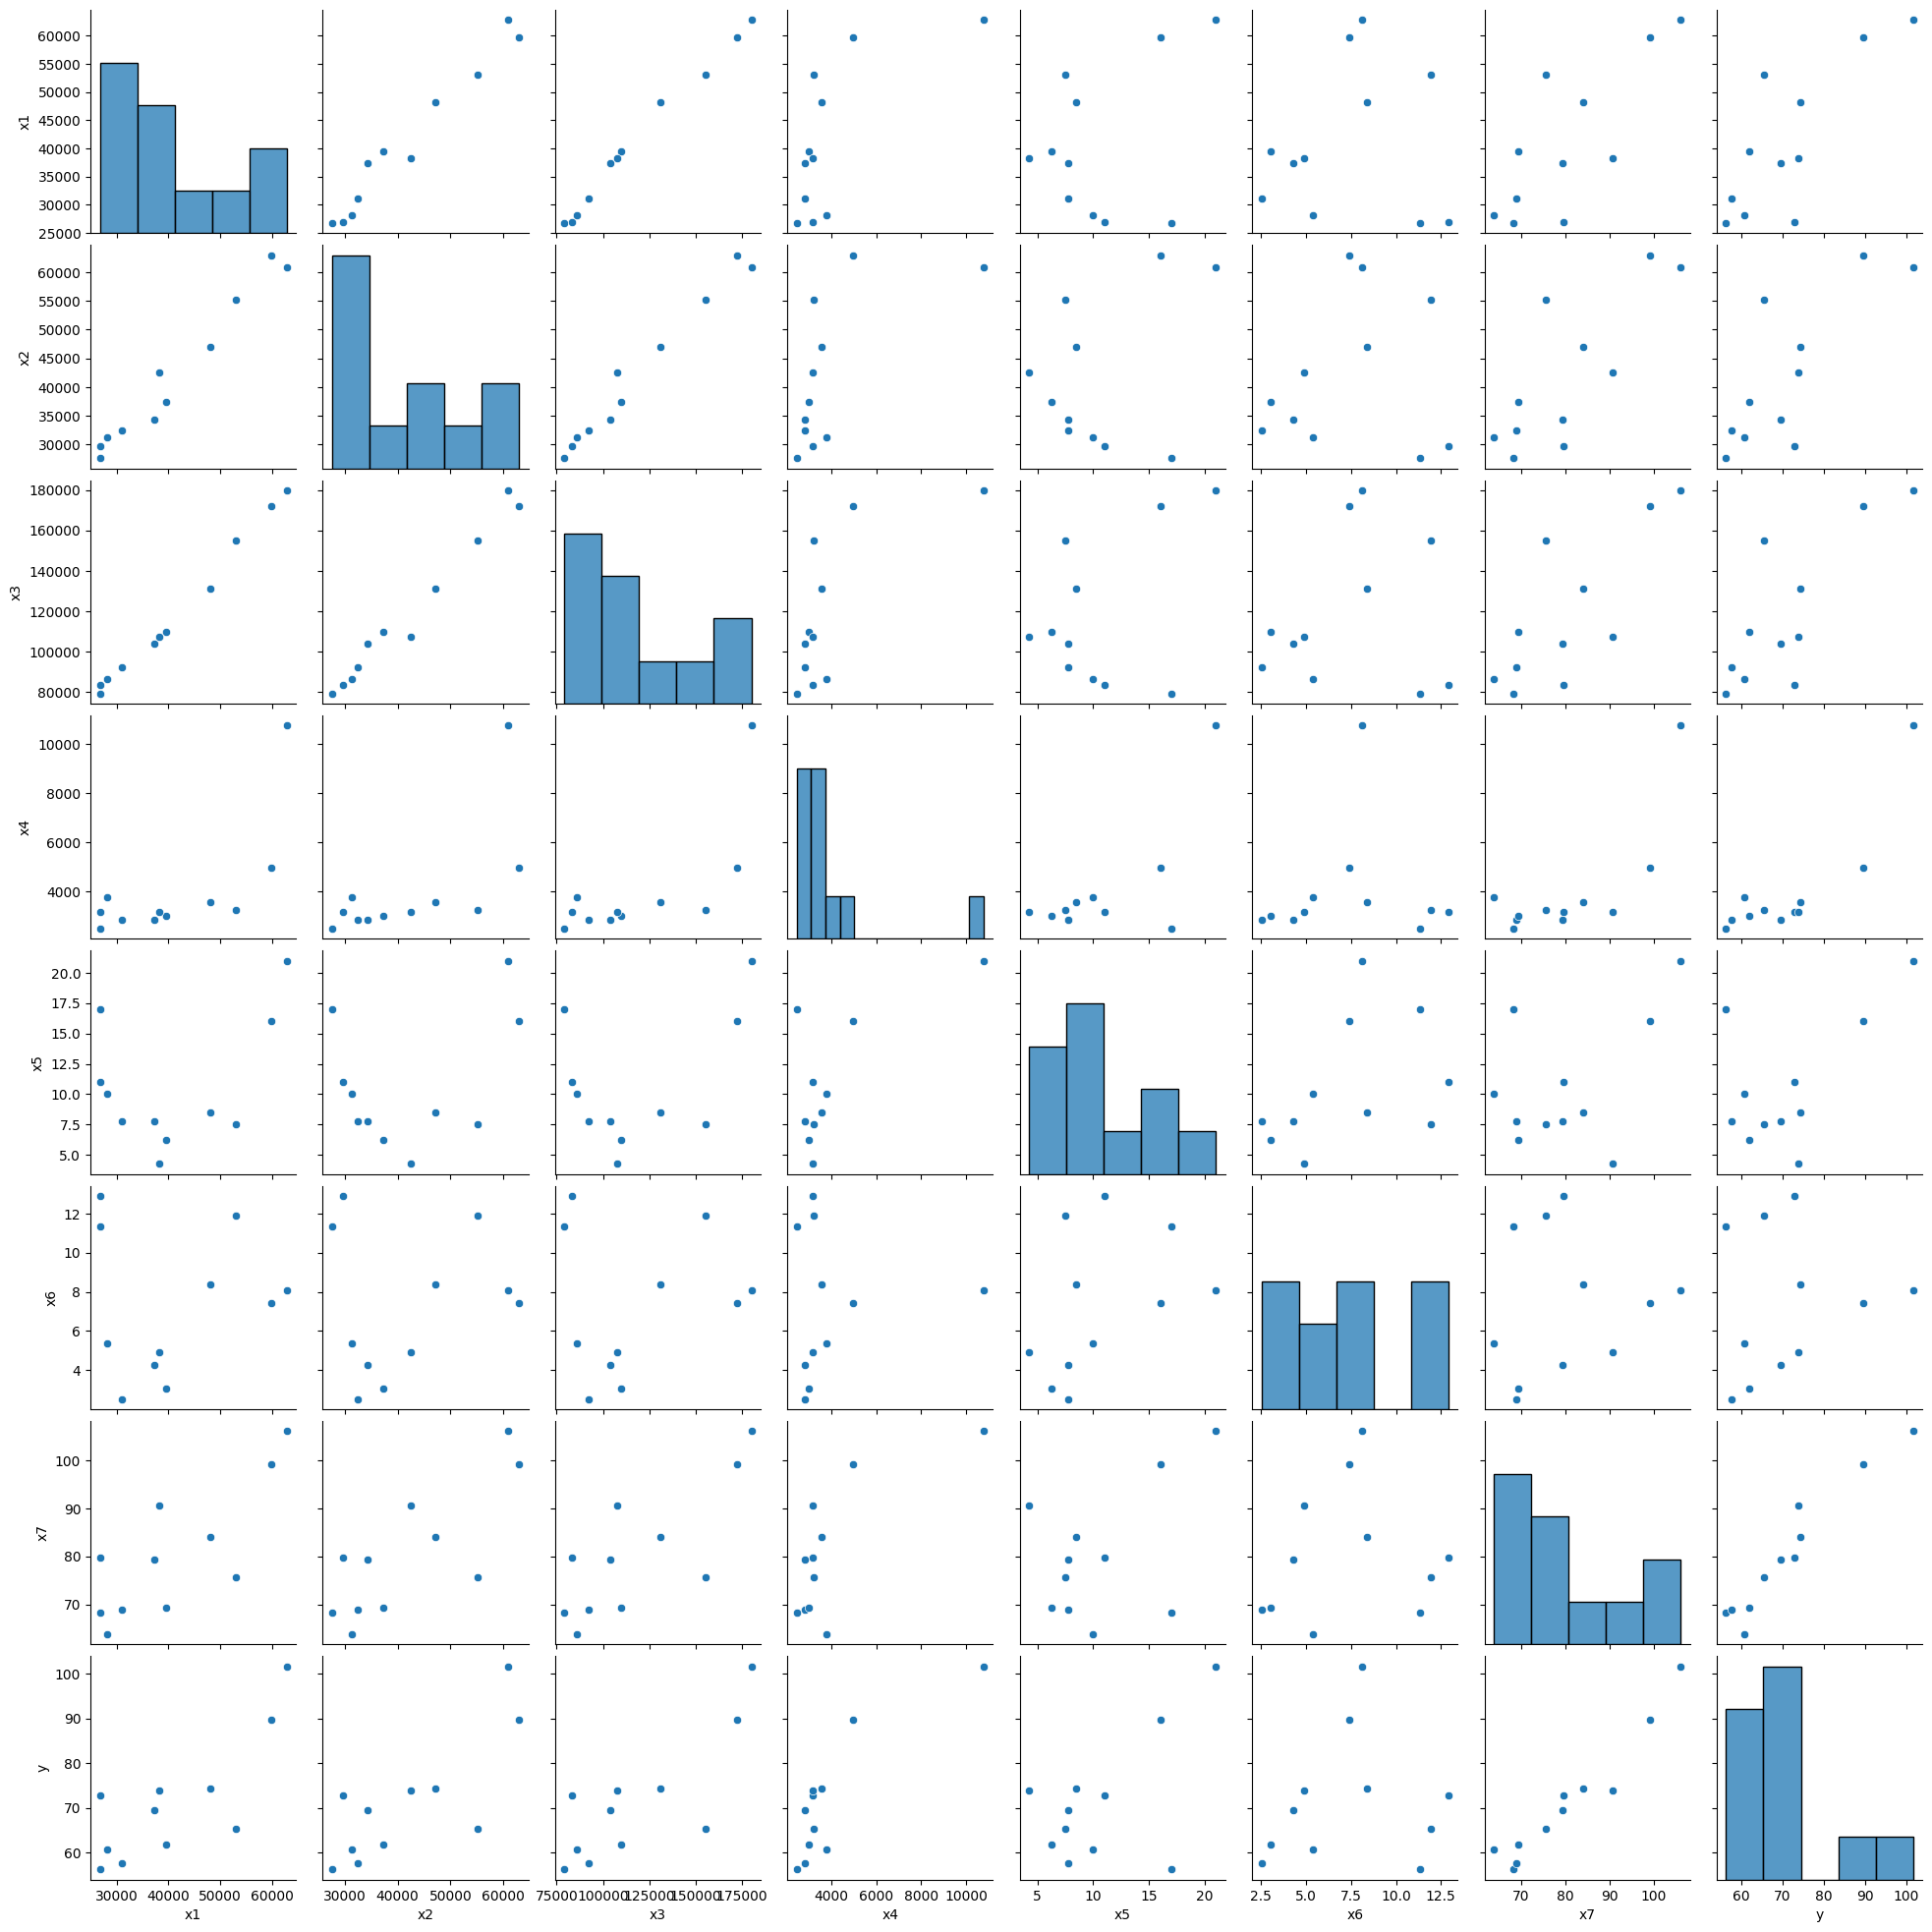

In [5]:
sns.pairplot(df)

In [33]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,y
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,41058.836364,41941.954545,118176.472727,3985.672727,10.636364,7.292727,80.471818,71.250909
std,13074.830760,12809.279711,36190.623133,2344.799461,5.179724,3.614089,13.532537,13.900233
min,26766.000000,27612.000000,79199.700000,2479.100000,4.250000,2.520000,63.810000,56.260000
25%,29614.500000,31860.000000,89092.900000,2925.600000,7.625000,4.590000,69.105000,61.285000
50%,38206.000000,37382.000000,107390.300000,3182.700000,8.500000,7.420000,79.460000,69.470000
75%,50595.900000,51127.500000,143101.950000,3674.450000,13.500000,9.875000,87.375000,74.085000
max,62779.400000,62984.000000,179956.000000,10770.000000,21.000000,12.910000,106.100000,101.680000


*Корреляционная матрица*

In [34]:
df.corr(method='kendall')

,x1,x2,x3,x4,x5,x6,x7,y
x1,1.000000,0.927273,1.000000,0.527273,-0.073398,0.018182,0.563636,0.600000
x2,0.927273,1.000000,0.927273,0.527273,-0.146795,0.018182,0.563636,0.600000
x3,1.000000,0.927273,1.000000,0.527273,-0.073398,0.018182,0.563636,0.600000
x4,0.527273,0.527273,0.527273,1.000000,0.293590,0.200000,0.454545,0.563636
x5,-0.073398,-0.146795,-0.073398,0.293590,1.000000,0.330289,0.146795,0.183494
x6,0.018182,0.018182,0.018182,0.200000,0.330289,1.000000,0.163636,0.200000
x7,0.563636,0.563636,0.563636,0.454545,0.146795,0.163636,1.000000,0.890909
y,0.600000,0.600000,0.600000,0.563636,0.183494,0.200000,0.890909,1.000000


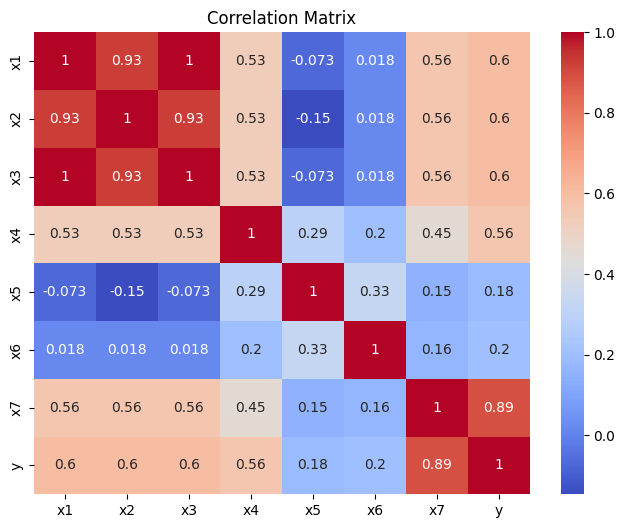

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='kendall'), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Y хорошо коррелируют с переменными x1, x2, x3, x4, x7

*Коэффициент инфляции дисперсии (VIF). Проверка на мультиколлениарность.*

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

X_selected = df[['x1', 'x4', 'x7']]
X_selected = sm.add_constant(X_selected)

pd.DataFrame({
    'Variable': X_selected.columns,
    'VIF': [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
})


,Variable,VIF
0,const,59.557222
1,x1,2.729428
2,x4,2.341797
3,x7,3.199048


Оставляем все переменные, поскольку показатели VIF<10

**Линейная регрессия. МНК**

In [53]:
import statsmodels.api as sm
X = df[['x1', 'x4', 'x7']]
X = sm.add_constant(X)  # Добавляем столбец единиц для константы
y = df['y']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     71.61
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.28e-05
Time:                        23:49:38   Log-Likelihood:                -25.027
No. Observations:                  11   AIC:                             58.05
Df Residuals:                       7   BIC:                             59.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0538      6.867      0.445      0.6

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Тест Шапиро-Уилка. Проверка на нормальность распределения остатков**

In [54]:
import statsmodels.api as sm
from scipy import stats

X = df[['x4', 'x7']] 
y = df['y']  

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
stat, p_value = stats.shapiro(residuals)

print('Статистика Шапиро-Уилка:', stat)
print('P-значение:', p_value)
if p_value > 0.05:
    print("Нет оснований отвергать гипотезу о нормальности остатков.")
else:
    print("Остатки не следуют нормальному распределению.")


Статистика Шапиро-Уилка: 0.9380626710926645
P-значение: 0.4979974759269694
Нет оснований отвергать гипотезу о нормальности остатков.


**Тест Бреуша-Пагана (Breusch-Pagan Test). МНК**

In [55]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Подбор модели
X = df[['x4', 'x7']] 
y = df['y'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

bp_test_stat, bp_test_p_value, _, _ = bp_test

print(f"Статистика теста Бреуша-Пагана: {bp_test_stat}")
print(f"P-значение: {bp_test_p_value}")
if bp_test_p_value > 0.05:
    print("Нет оснований отвергать гипотезу о гомоскедастичности.")
else:
    print("Обнаружена гетероскедастичность.")


Статистика теста Бреуша-Пагана: 1.4858556201447402
P-значение: 0.4757190595266193
Нет оснований отвергать гипотезу о гомоскедастичности.


**Тест Дарбина-Уотсона. МНК**

In [59]:
from statsmodels.stats.stattools import durbin_watson

# Остатки модели
residuals = model.resid

# Тест Дарбина-Уотсона
dw_stat = durbin_watson(residuals)

print(f"Статистика Дарбина-Уотсона: {dw_stat:.4f}")

# Интерпретация
if 1.5 < dw_stat < 2.5:
    print("Остатки не демонстрируют существенной автокорреляции.")
elif dw_stat <= 1.5:
    print("Наблюдается положительная автокорреляция остатков.")
else:
    print("Наблюдается отрицательная автокорреляция остатков.")


Статистика Дарбина-Уотсона: 2.6016
Наблюдается отрицательная автокорреляция остатков.


**GLSAR**

In [6]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import GLSAR

X = df[['x4','x7']]
X = sm.add_constant(X)
y = df['y']

model_glsar = GLSAR(y, X, rho=1)
res_glsar = model_glsar.iterative_fit(maxiter=10)
print(res_glsar.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.986
Model:                          GLSAR   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     248.6
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           3.15e-07
Time:                        13:14:06   Log-Likelihood:                -20.636
No. Observations:                  10   AIC:                             47.27
Df Residuals:                       7   BIC:                             48.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8594      4.809      1.634      0.1

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Тест Бреуша-Пагана (Breusch-Pagan Test). GLSAR**

In [6]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import GLSAR
from statsmodels.stats.diagnostic import het_breuschpagan

X = df[['x4', 'x7']]
X = sm.add_constant(X)
y = df['y']

model_glsar = GLSAR(y, X, rho=1)
results_glsar = model_glsar.fit()
bp_test = het_breuschpagan(results_glsar.resid, results_glsar.model.exog)
bp_test_stat, bp_test_p_value, _, _ = bp_test

print(f"Статистика теста Бреуша-Пагана: {bp_test_stat}")
print(f"P-значение: {bp_test_p_value}")
if bp_test_p_value > 0.05:
    print("Нет оснований отвергать гипотезу о гомоскедастичности.")
else:
    print("Обнаружена гетероскедастичность.")


Статистика теста Бреуша-Пагана: 1.7236702822426353
P-значение: 0.42238623229438466
Нет оснований отвергать гипотезу о гомоскедастичности.
